In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("../data/coronavirus/coronavirus0410.csv", index_col="Country,Other")
data_df.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,"31,802,772",NaN,"574,840",NaN,"24,346,766",NaN,"6,881,166","9,078","95,647","1,729","416,789,330","1,253,501","332,500,290",2021-04-10
Brazil,"13,375,414",NaN,"348,934",NaN,"11,791,885",NaN,"1,234,595","8,318","62,582","1,633","28,600,000","133,817","213,724,704",2021-04-10
India,"13,205,926","+3,143","168,467",NaN,"11,990,859","+2,919","1,046,600","8,944","9,498",121,"255,214,803","183,547","1,390,456,911",2021-04-10
France,"4,980,501",NaN,"98,395",NaN,"303,639",NaN,"4,578,467","5,729","76,172","1,505","68,007,540","1,040,108","65,385,105",2021-04-10
Russia,"4,623,984",NaN,"102,247",NaN,"4,248,700",NaN,"273,037","2,300","31,675",700,"123,000,000","842,565","145,982,840",2021-04-10


In [3]:
data_df.shape

(221, 14)

In [4]:
data_df.dtypes

TotalCases           object
NewCases             object
TotalDeaths          object
NewDeaths           float64
TotalRecovered       object
NewRecovered         object
ActiveCases          object
Serious,Critical     object
Tot Cases/1M pop     object
Deaths/1M pop        object
TotalTests           object
Tests/1M pop         object
Population           object
Date                 object
dtype: object

In [5]:
obj_col = set(data_df.select_dtypes(include=['object']).columns)-set(["Date"])
def convert(df):
    if df.name in obj_col:
        df = pd.to_numeric(df.str.replace(",", ""), errors='coerce')
    return df
data_df=data_df.apply(convert)

In [6]:
data_df.dtypes

TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population          float64
Date                 object
dtype: object

In [7]:
data_df.isna().sum()

TotalCases            0
NewCases            208
TotalDeaths          15
NewDeaths           212
TotalRecovered        2
NewRecovered        208
ActiveCases           2
Serious,Critical     76
Tot Cases/1M pop      2
Deaths/1M pop        17
TotalTests           12
Tests/1M pop         12
Population            2
Date                  0
dtype: int64

In [8]:
def missing_ratio(df):
    return df.isna().sum()/len(df)

missing_ratio = data_df.loc[:,data_df.columns != "Date"].apply(missing_ratio)#.apply('{:.3%}'.format)
sum=  data_df.loc[:,data_df.columns != "Date"].agg('sum').apply('{:3}'.format)
info_df = pd.DataFrame([missing_ratio, sum], index=["Missing Ratio", "Sum"])
info_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
Missing Ratio,0,0.941176,0.0678733,0.959276,0.00904977,0.941176,0.00904977,0.343891,0.00904977,0.0769231,0.0542986,0.0542986,0.00904977
Sum,135315183.0,25314.0,2928782.0,1098.0,108859547.0,25624.0,21365034.0,102124.0,6278379.0,103330.3,1976710135.0,115559796.0,7817558576.0


In [9]:
pd.options.display.float_format = '{:.2f}'.format
data_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,4,nan,nan,nan,4.00,nan,0.00,nan,67.00,nan,nan,nan,59498.00,2021-04-10
Samoa,3,nan,nan,nan,2.00,nan,1.00,nan,15.00,nan,nan,nan,199431.00,2021-04-10
Vanuatu,3,nan,nan,nan,1.00,nan,2.00,nan,10.00,nan,470.00,1503.00,312643.00,2021-04-10


In [10]:
# data_df.fillna(data_df.mean(), inplace=True)
data_df.sort_values(by="TotalCases", ascending=False)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,9,nan,2.00,nan,7.00,nan,0.00,nan,nan,nan,nan,nan,nan,2021-04-10
Marshall Islands,4,nan,nan,nan,4.00,nan,0.00,nan,67.00,nan,nan,nan,59498.00,2021-04-10
Samoa,3,nan,nan,nan,2.00,nan,1.00,nan,15.00,nan,nan,nan,199431.00,2021-04-10


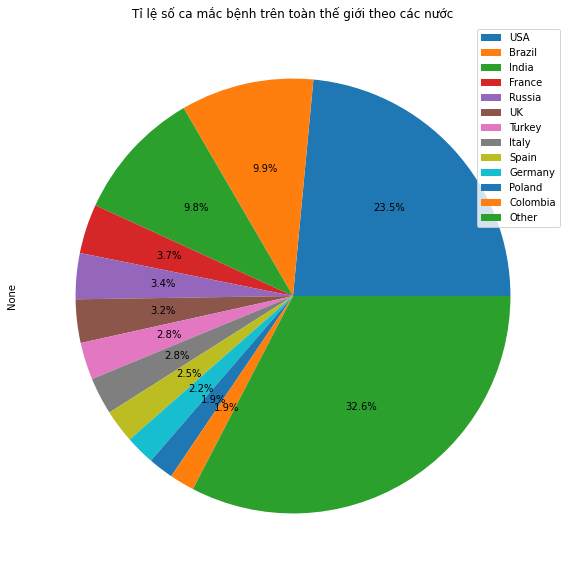

In [11]:
# data_df["TotalCases"].plot(kind='pie')
threshold = 2504206
part = data_df[data_df["TotalCases"] >=threshold]["TotalCases"]
other = pd.Series({"Other":data_df[data_df["TotalCases"] <threshold]["TotalCases"].sum()})
total=pd.concat([part, other])
ax=total.plot.pie(autopct='%1.1f%%', figsize=(25, 10), labels=None, legend='best')
plt.title("Tỉ lệ số ca mắc bệnh trên toàn thế giới theo các nước")
plt.show()
# ax.text(x=total.index, y= total.values, s=total)


In [12]:
# death=data_df.iloc[:15,1].sort_values(ascending=True)
# plt.figure(figsize=(12, 6))
# ax=sns.barplot(y=death.index, x = death.values, orient="h")
# ax.set_title("Tổng số người chết tại một số nước trên thế giới")
# # plt.title("Tổng số người chết tại một số nước trên thế giới")

Chọn các thuộc tính TotalCasess, TotalDeaths, TotalRecovered, ActiveCases, TotalTests, Population

In [17]:
df = data_df[["TotalCases", "TotalDeaths", "TotalRecovered"]]#, "ActiveCases", "TotalTests", "Population"]]
df.describe()

,TotalCases,TotalDeaths,TotalRecovered
count,221.00,206.00,219.00
mean,612285.90,14217.39,497075.56
std,2569863.34,52972.91,2069764.98
min,1.00,1.00,1.00
25%,4329.00,93.25,3107.50
50%,37147.00,748.50,28161.00
75%,266677.00,5579.00,224323.00
max,31802772.00,574840.00,24346766.00


array([[<AxesSubplot:title={'center':'TotalCases'}>,
        <AxesSubplot:title={'center':'TotalDeaths'}>],
       [<AxesSubplot:title={'center':'TotalRecovered'}>, <AxesSubplot:>]],
      dtype=object)

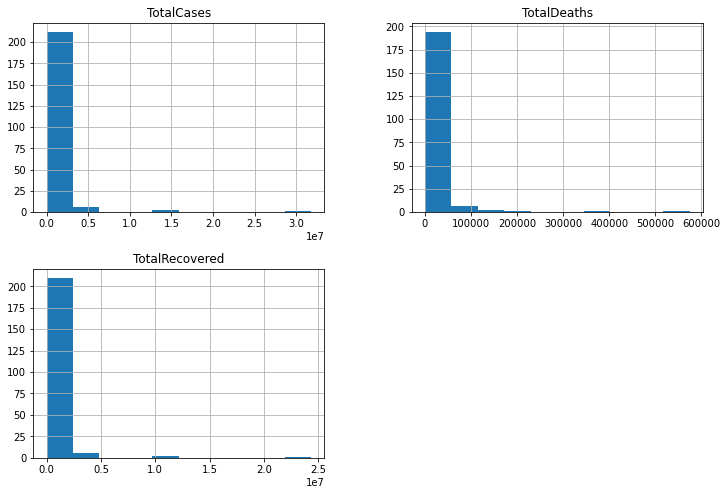

In [18]:
df.hist(figsize=(12, 8))

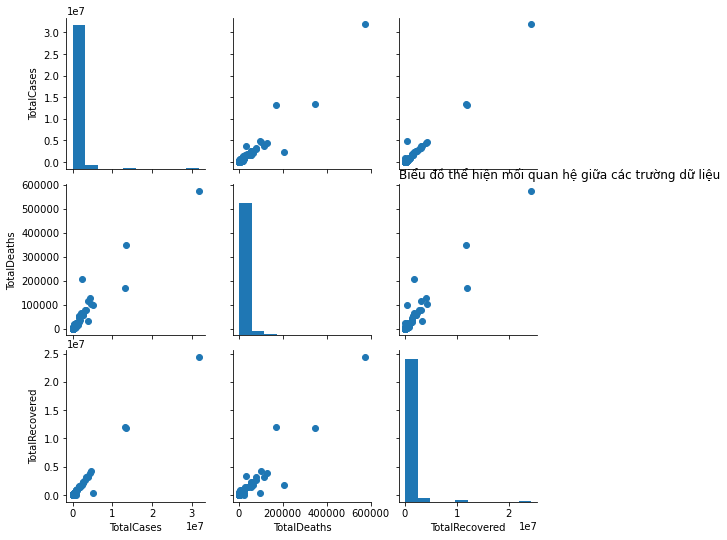

In [22]:
g = sns.PairGrid(df)
# g.map(plt.scatter)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title("Biểu đồ thể hiện mối quan hệ giữa các trường dữ liệu", loc='left')
plt.show()

# Trường dữ liệu TotalDeaths

- Đễ dàng biểu diễn. ta chỉ chọn ra top 10 quốc gia, vùng lãnh thổ có tỉ lệ mắc bệnh lớn

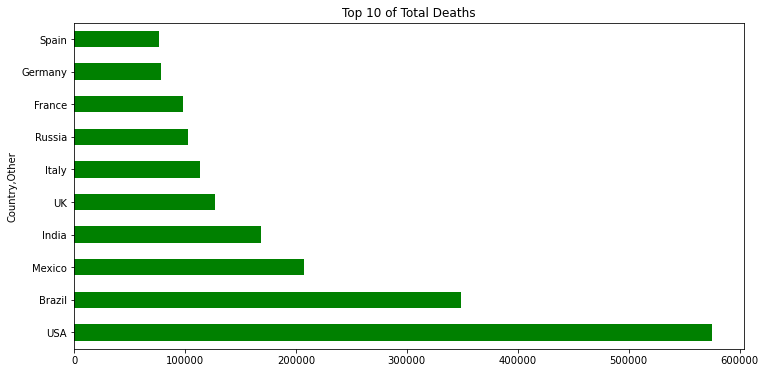

In [28]:
df_10=df.sort_values(by=["TotalDeaths"], ascending=False)[:10]
fig, ax =plt.subplots()
# fig.tight_layout()
df_10.TotalDeaths.plot(kind='barh',figsize=(12, 6), title="Top 10 of Total Deaths", color='green')
# df_10.TotalCases.plot(kind='barh', ax=axs[1], figsize=(12, 6), title="Top 10 of Total Cases", color='green')
plt.show()

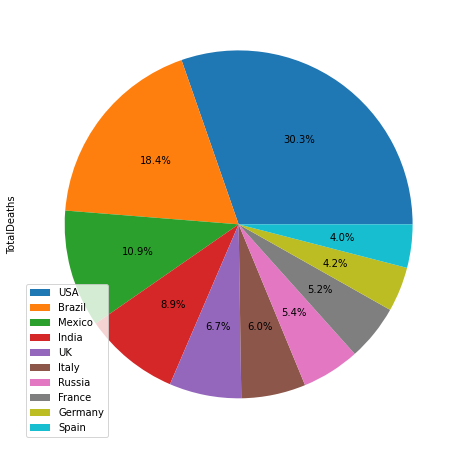

In [30]:
fig, ax=plt.subplots()
# fig.tight_layout()
df_10.TotalDeaths.plot(kind='pie', autopct='%1.1f%%',figsize=(12, 8), labels=None, ax=ax)
# df_10.TotalCases.plot(kind='pie', autopct='%1.1f%%',figsize=(12, 8), labels=None, ax=axs[1])
plt.legend(loc='lower left', labels = df_10.index)
plt.show()

In [ ]:
check = df["TotalCases"]-df["TotalDeaths"] - df["TotalRecovered"]-df["ActiveCases"]
check

In [ ]:
check.loc[check.values!=0.00]

df["TotalCases"] == (df["TotalCases"]-df["TotalDeaths"] - df["TotalRecovered"]-df["ActiveCases"])

In [ ]:
data =df_10[["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases"]]
g = sns.FacetGrid(data)
g.map(plt.hist, "TotalDeaths", stacked=True, color='green')
g.map(plt.hist, "TotalRecovered", stacked=True)

In [ ]:
df_10[["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases"]]

In [ ]:
df_10[["TotalDeaths", "TotalRecovered", "ActiveCases"]].plot(kind='barh', stacked=True, figsize=(20, 8))
